In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
v = np.array([[1,2,3]]).T
w = np.array([[10,20]])

v+w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

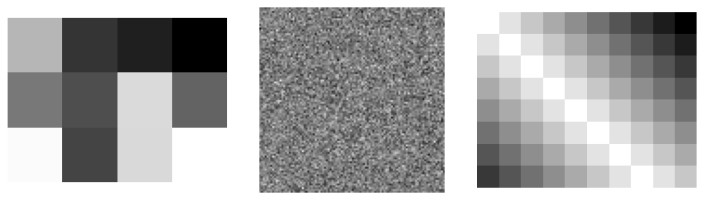

In [3]:
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8), np.arange(10)) #토플리츠 행렬(첫번째 인수(행), 두번째 인수(열) 이용해 대각선이 일정한 패턴을 갖는 행렬)
    # 부호를 반대로 설정하여 대각선이 흰색이 되도록 설정(- 없으면 대각선이 검정색)

fig, axs = plt.subplots(1,3, figsize=(10,3))

axs[0].imshow(A, cmap='gray')
axs[1].imshow(B, cmap='gray')
axs[2].imshow(C, cmap='gray')

for i in range(3) : axs[i].axis('off') #축 제거

plt.tight_layout() # 그래프 간 간격을 자동으로 조정
plt.savefig('Figure_04_01.png', dpi=600)
plt.show()

# Slicing out rows and columns

In [4]:
A = np.reshape(np.arange(1,10), (3,3)) # 1~10까지의 1차원 정수 배열을 3*3 행렬로 변환

print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
print(A[1,:])

print(A[1])

[4 5 6]
[4 5 6]


In [6]:
print(A[:,1])

[2 5 8]


In [7]:
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [8]:
print(A[0:2, 1:2])


[[2]
 [5]]


In [9]:
print(A[0:2:1, 0:2:1]) #[start : stop : step] = [시작 : 종료 : 간격]

[[1 2]
 [4 5]]


In [10]:
A = np.arange(60).reshape(6,10)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [11]:
sub = A[1:4:1 , 0:5:1]

sub

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

# Some special matrices

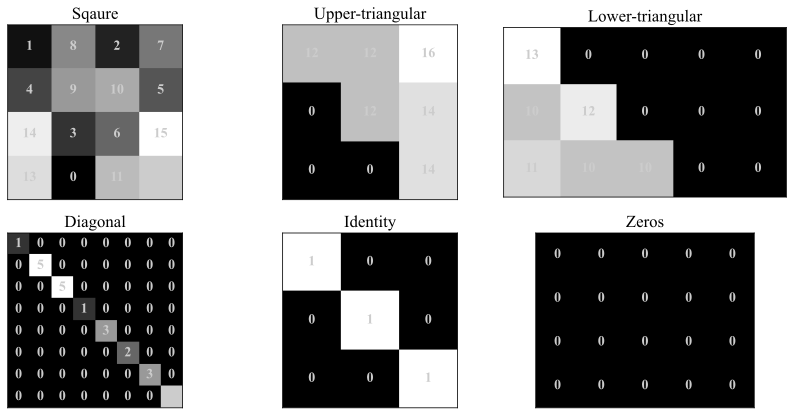

In [12]:
#square
M1 = np.random.permutation(16).reshape(4,4)

#upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

#lower-triangular square
M3 = np.tril(np.random.randint(8,16, (3,5)))

#diagonal
M4 = np.diag(np.random.randint(0,6, size=8)) #8*8

#ientity
M5 = np.eye(3,dtype=int)

#zeros
M6 = np.zeros((4,5), dtype=int)

matrices = [M1, M2, M3, M4, M5, M6]
matLabels = ['Sqaure', 'Upper-triangular', 'Lower-triangular', 'Diagonal', 'Identity', 'Zeros']

_, axs = plt.subplots(2,3, figsize=(12,6)) # _ : figure 객체(전체 그림 조작할 때 필요)를 무시하고 가져오지 않겠다는 의미(axs(개별 서브플롯 조작할 때 필요)만 사용함)
axs = axs.flatten()

for mi, M in enumerate(matrices): #mi : matrix index, M : matrix
    axs[mi].imshow(M, cmap='gray', origin='upper', vmin=np.min(M), vmax=np.max(M)) #origin='upper' = (0,0)위치가 이미지의 왼쪽 위에 오도록 설정, vmin&vmax = 행렬의 최소값과 최대값을 기준으로 명암조정

    axs[mi].set(xticks=[], yticks=[]) # 축제목 제거
    axs[mi].set_title(matLabels[mi])

    for (j,i), num in np.ndenumerate(M): #행렬의 각 요소에 대해 좌표 (j,i), num을 반환(다차원 배열을 인덱스와 값으로 순회)
        axs[mi].text(i,j,num,color=[.8,.8,.8], ha='center', va='center', fontweight='bold')

plt.savefig('Figure_04_02.png', dpi=600)
plt.tight_layout()
plt.show()


# Some more details about special matrices

In [13]:
# matrix size parameters

Mrows = 4
Ncols = 6

A = np.random.randn(Mrows, Ncols)

np.round(A,3)

array([[ 0.573, -2.259,  2.175,  1.614, -1.256, -1.673],
       [ 1.656, -0.087,  0.325,  0.984, -0.119, -0.14 ],
       [ 0.724, -1.925, -0.43 , -0.652,  1.026, -1.123],
       [ 0.589,  1.415,  1.629, -1.011,  0.277, -0.058]])

In [14]:
# Extract the triangular part of a dense matrix

M = 4
N = 6

A = np.random.randn(M,N)

print('Upper triangular:\n')
print(np.triu(A))

print('Lower triangular:\n')
print(np.tril(A))

Upper triangular:

[[ 1.20544852 -0.77560855 -0.88535607 -0.91870105 -0.58223451  1.3498961 ]
 [ 0.          0.25487913  0.21801832  0.92282995 -0.66131855  1.51560835]
 [ 0.          0.         -0.69344818  1.65435744  0.36739878 -0.42092713]
 [ 0.          0.          0.          1.47965978  0.65870685 -0.03076888]]
Lower triangular:

[[ 1.20544852  0.          0.          0.          0.          0.        ]
 [ 0.92076713  0.25487913  0.          0.          0.          0.        ]
 [-0.47442072  0.16321252 -0.69344818  0.          0.          0.        ]
 [-0.76937219 -0.85204407  0.78110081  1.47965978  0.          0.        ]]


In [15]:
# Diagonal

A = np.random.randn(5,5)
d = np.diag(A)

print('Original :\n', A)
print('\n\nInput a matrix :\n', d)

# OR input a vector to create a diagonal matrix

v = np.arange(1,6)
D = np.diag(v)

print('\n\nInput vector :', v)
print('\n\nInput a vector :\n', D)

Original :
 [[ 0.30398056  1.00990629 -0.31244904  0.34723412 -0.21091388]
 [ 0.08289416 -0.72352943 -2.11726151 -2.02840124 -1.03000762]
 [-0.46017741 -0.25745247 -0.45618108  0.62098469 -0.35919231]
 [-0.02154543  1.45727786  0.52924952  1.21236409  1.74939662]
 [-1.65556389 -0.27397602 -1.40807728 -0.1191195  -1.0915414 ]]


Input a matrix :
 [ 0.30398056 -0.72352943 -0.45618108  1.21236409 -1.0915414 ]


Input vector : [1 2 3 4 5]


Input a vector :
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [16]:
# Identity matrices

n = 4
I = np.eye(n) #np.identity() 가 항상 정사각행렬을 만드는 반면 np.eye는 비정사각 행렬도 만들 수 있음(I와 발음 유사)

print(f'The {n}x{n} identity matix :\n', I)

The 4x4 identity matix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
#Zero matries

n = 4
m = 5
I = np.zeros((n,m))

print(f'The {n}x{m} zeros matrix :\n', I)

The 4x5 zeros matrix :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Matrix addition

In [18]:
A = np.array([ [2,3,4],
              [1,2,4]])

B = np.array(( [0,3,1],
              [-1,-4,2]))


print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]


## Shifting a matrix

In [19]:
3 + np.eye(2)

array([[4., 3.],
       [3., 4.]])

In [20]:
A = np.array([ [4,5,1],
              [0,1,11],
              [4,9,7]])

s = 6

print('Original matrix : ')
print(A), print('  ')

print('Broadcasting addition : ')
print(A+s), print('   ')

print('Shifting : ') #행렬의 대각선 요소를 특정 값으로 이동(변경)
print(A + s*np.eye(len(A)))

Original matrix : 
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
Broadcasting addition : 
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
   
Shifting : 
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


## Scalar multiplication

In [21]:
print(A), print('  ')

print(s*A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


## Hadamard multiplication

In [22]:
A = np.random.randn(3,4)
B = np.random.randn(3,4)

print(A*B) #요소별 곱셈
print('\n\n')
print(np.multiply(A,B)) #요소별 곱셈
print('\n\n')
print(A@B) #행렬곱 -> 첫행렬의 열 개수와 두번째 행렬의 행의 개수가 같아야 가능

[[ 1.94154367 -1.19906398  0.01899235  0.56596936]
 [ 0.434425   -0.0266718   0.02768416  0.43402813]
 [-0.46228543  0.07918508  2.34969724  1.14495344]]



[[ 1.94154367 -1.19906398  0.01899235  0.56596936]
 [ 0.434425   -0.0266718   0.02768416  0.43402813]
 [-0.46228543  0.07918508  2.34969724  1.14495344]]





ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

# "Standard" matrix multiplication

In [ ]:
A = np.random.randn(3,6)
B = np.random.randn(6,4)
C = np.random.randn(6,4)

print((A@B).shape) # 3*4
print(np.dot(A,B).shape) # 3*4
print((A@C).shape) #3*4
print((B@C).shape) #오류 발생

(3, 4)
(3, 4)
(3, 4)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

In [ ]:
print(np.multiply(B,C)) , print('  ') #6*4 행렬곱
print(np.dot(B,C.T)) #6*6 내적

[[ 3.41513732e-01  4.32827924e-02  2.59263332e+00  2.33139337e-01]
 [-9.89484145e-01  7.32570734e-01  6.29566954e-01 -9.69910174e-02]
 [-3.38974087e-02 -7.54148674e-01  7.01233151e-01 -3.04789626e-02]
 [-1.12612565e-03 -2.27685698e+00 -1.21254776e-02 -5.11600629e-01]
 [-2.47019400e+00 -2.89229580e-01  5.01814553e-03 -2.74840715e+00]
 [-1.22054300e+00  1.28992917e+00  7.94095006e-01 -6.87413206e-01]]
  
[[ 3.21056918  1.03682053 -0.02944403 -4.23475748  1.06546922 -3.8058894 ]
 [ 0.89188615  0.27566253 -1.99981549  2.0816445   2.91278516  2.22037048]
 [-0.8232899  -0.77426352 -0.11729189  1.2602955   0.985616    2.64539505]
 [ 0.27318294 -1.01456177  1.83026326 -2.80170921 -0.37497034 -1.54689834]
 [-1.26566649  3.05745443 -0.2975251  -0.31115749 -5.50281258 -1.85368611]
 [-1.06684944 -2.32410655  0.6797743   2.69534     1.19334163  0.17606798]]


# Geometry of matrix-vector multiplication

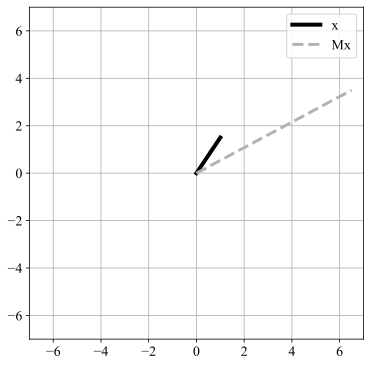

In [ ]:
M = np.array([[2,3], [2,1]])
x = np.array([[1,1.5]]).T
Mx = M@x

plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]], [0, x[1,0]], 'k', linewidth=4, label='x')
plt.plot([0, Mx[0,0]], [0, Mx[1,0]], '--', linewidth=3, color=[.7,.7,.7], label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_04_05a.png', dpi=300)
plt.show()

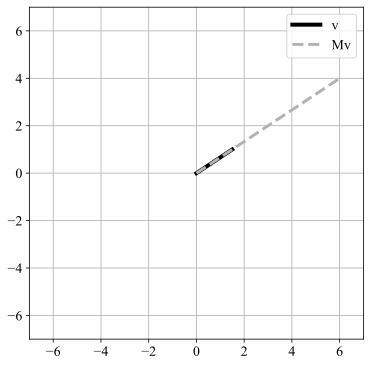

In [ ]:
M = np.array([[2,3], [2,1]])
v = np.array([[1.5,1]]).T
Mv = M@v

plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]], [0, v[1,0]], 'k', linewidth=4, label='v')
plt.plot([0, Mv[0,0]], [0, Mv[1,0]], '--', linewidth=3, color=[.7,.7,.7], label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_04_05b.png', dpi=300)
plt.show()

# Transpose

In [ ]:
A = np.array([[3,4,5], [1,2,3]])

A_T1 = A.T
A_T2 = np.transpose(A)

A_TT = A_T1.T

print(A_T1) , print('  ')
print(A_T2) , print('  ')
print(A_TT)

[[3 1]
 [4 2]
 [5 3]]
  
[[3 1]
 [4 2]
 [5 3]]
  
[[3 4 5]
 [1 2 3]]


## Exercise 1

In [ ]:
# indexing

A = np.arange(12).reshape(3,4)
print(A)

ri = 1
ci = 3

print(f'\nThe matrix element at index ({ri+1}, {ci+1} is {A[ri,ci]})')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

The matrix element at index (2, 4 is 7)


## Exercise 2

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
  
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


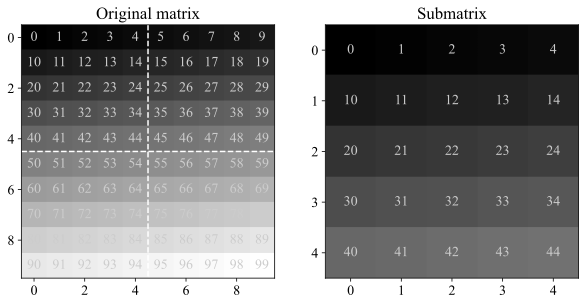

In [ ]:
C = np.arange(100).reshape((10,10)) # (()) : 튜플 형태를 명시적으로 전달, () : 튜플을 암묵적으로 생성하는 간단한 표현

#extract submatrix

C_1 = C[0:5:1, 0:5:1] #row, column, 간격

print(C), print('  ')
print(C_1)

_, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].imshow(C, cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
axs[0].plot([4.5, 4.5], [-.5,9.5], 'w--')
axs[0].plot([-.5, 9.5], [4.5,4.5], 'w--')
axs[0].set_title('Original matrix')

for (j,i), num in np.ndenumerate(C):
    axs[0].text(i,j, num, color=[.8,.8,.8], ha='center', va='center')

axs[1].imshow(C_1, cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
axs[1].set_title('Submatrix')

for (j,i), num in np.ndenumerate(C_1): #좌표와 값을 쌍으로 반환 ex) (0,0) 1 
    axs[1].text(i,j,num,color=[.8,.8,.8], ha='center', va='center')

plt.savefig('Figure_04_06.png', dpi=600)
plt.show()

## Exercise 3

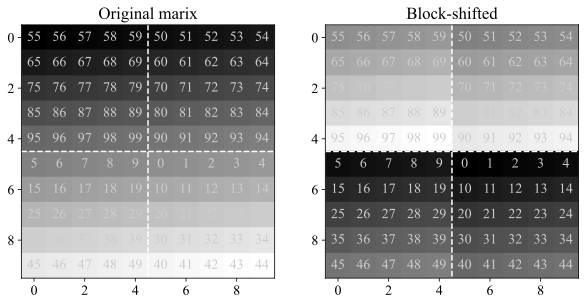

In [ ]:
C_1 = C[0:5:1, 0:5:1]
C_2 = C[0:5:1, 5:10:1]
C_3 = C[5:10:1, 0:5:1]
C_4 = C[5:10:1, 5:10:1]

# rearrange the blocks
newMatrix = np.vstack((np.hstack((C_4, C_3)),
                       np.hstack((C_2, C_1))))

_, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].imshow(C, cmap='gray', origin='upper', vmin=0, vmax=np.max(C)) #origin='upper' :  이미지의 원점을 위쪽으로 설정
axs[0].plot([4.5, 4.5], [-.5, 9.5], 'w--') #x축 점선
axs[0].plot([-.5, 9.5], [4.5, 4.5], 'w--') #y축 점선
axs[0].set_title('Original marix')

for (j,i), num in np.ndenumerate(newMatrix):
    axs[0].text(i,j, num, color=[.8,.8,.8], ha='center', va='center')

axs[1].imshow(newMatrix, cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
axs[1].plot([4.5, 4.5], [-.5, 9.5], 'w--') #x축 점선
axs[1].plot([-.5, 9.5], [4.5, 4.5], 'w--') #y축 점선
axs[1].set_title('Block-shifted')

for (j,i), num in np.ndenumerate(newMatrix):
    axs[1].text(i,j, num, color=[.8,.8,.8], ha='center', va='center')

plt.savefig('Figure_04_07.png', dpi=600)
plt.show()


## Exercise 4

In [ ]:
# 원소별 행렬 덧셈

def addMatrices(A,B):
    if A.shape != B.shape:
        raise('Matrices must be the same size!')
    
    # initialize sum matix
    C = np.zeros(A.shape)

    # sum!
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            C[i,j] = A[i,j] + B[i,j]

    return C

M1 = np.zeros((6,4))
M2 = np.ones((6,4))

addMatrices(M1, M2)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## Exercise 5

In [ ]:
A = np.random.randn(3,4)
B = np.random.randn(3,4)
C = np.random.randn()

expr1 = s*(A+B) # s : 스칼라
expr2 = s*A + s*B
expr3 = A*s + B*s #교환 법칙 성립

print(np.round(2*expr1 - expr2 - expr3, 8)) # 이론적으로 expr1 = expr2 = expr3 이므로 결과는 0이 나와야 함
## 결과 해석
# -0 -> 부동소수점 연산 오차로 인한 것


[[-0. -0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0. -0.  0.  0.]]


In [ ]:
print(A)
print('\n')
print(B)
print('\n')
print(C)

[[-1.03704971  1.72805714 -0.93880851  1.12049825]
 [ 1.88146712  0.89680422  0.4757584   0.62553784]
 [ 0.22053178 -1.5100428  -0.83760424 -0.28368051]]


[[ 0.05590758 -1.15440089 -0.64397657 -0.47564309]
 [ 0.10832796  0.26118731  0.9144861   0.1263885 ]
 [-0.51399292 -1.44090874  1.66326164 -1.03328088]]


-0.2804659999753881


## Exercise 6

In [ ]:
# 행렬 곱셈

m = 4
n = 6
A = np.random.randn(m, n)
B = np.random.randn(n,m)

# 행렬 곱
C1 = np.zeros((m,m))
for rowi in range(m):
    for coli in range(m):
        C1[rowi, coli] = np.dot(A[rowi, :], B[:, coli])

C2 = A@B

print(np.isclose(C1, C2)) # 서로 같은지 비교(같으면 True, 다르면 False)
print('\n')
print(C1)
print('\n')
print(C2)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


[[ 2.02585688 -4.11919791 -3.68771131  1.79710477]
 [-0.8894438   0.46145196  0.74519378  0.60636599]
 [ 0.02300659 -0.59792783 -0.64757234  0.05923748]
 [ 2.08559289  2.24220333  0.48092074  1.64272661]]


[[ 2.02585688 -4.11919791 -3.68771131  1.79710477]
 [-0.8894438   0.46145196  0.74519378  0.60636599]
 [ 0.02300659 -0.59792783 -0.64757234  0.05923748]
 [ 2.08559289  2.24220333  0.48092074  1.64272661]]


## Exercise 7

In [28]:
L = np.random.randn(2,6)
I = np.random.randn(6,3)
V = np.random.randn(3,5)
E = np.random.randn(5,2)

res1 = (L@I@V@E).T
#res2 = L.T @ I.T @ V.T @ L.T #오류(크기가 맞지 않아 곱셈 불가
res3 = E.T @ V.T @ I.T @ L.T

print(res1)
print('\n')
print(res3)
print('\n')
print(np.round(res1-res3)) # 두 연산의 값이 동일한지 검토용(서로 같으면 결과가 0)

[[-3.34705440e-03  8.79587698e-01]
 [-3.53548799e+00 -1.64298210e+01]]


[[-3.34705440e-03  8.79587698e-01]
 [-3.53548799e+00 -1.64298210e+01]]


[[ 0. -0.]
 [-0.  0.]]


## Exercise 8

In [29]:
def isMatrixSymmetric(S):
    
    #difference between matrix and its transpose
    D = S-S.T

    # check whether sum of sqared erros(SSE) is smaller than a threshold
    sse = np.sum(D**2)

    # output TRUE if sse is tiny; False means the matrix is asymmetric(대칭이면 T, 비대칭이면 F)
    return sse<100**-15

In [30]:
A = np.random.randn(4,4)
AtA = A.T@A

print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

False
True


## Exercise 9

In [31]:
A = np.random.randn(4,4)
AtA = (A + A.T) / 2 # 대칭 행렬로 만드는 방법 : 평균화

print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

False
True


## Exercise 10

In [34]:
import plotly.graph_objects as go

A = np.array( [[3,0],
              [5,2],
              [1,2]])

xlim = [-4,4]
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100,2)) #np.random.uniform : 균등 분포 함수(최소값, 최대값, 개수)

points = np.zeros((100,3))
for i in range(len(scalars)):
    points[i,:] = A@scalars[i]

fig = go.Figure(data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers')])
fig.show()

## Exercise 11

In [42]:
n = 4

# base matrices

O = np.ones((n,n))
D = np.diag(np.arange(1,n+1)**2) # [1,2,3,4] 배열 생성 후 제곱 -> [1,4,9,16] -> 대각화
S = np.sqrt(D)

pre = D@O
post = O@D

both = S@O@S

# print out the "base" matrices
print('Ones matrix:')
print(O), print(' ')

print('Diagonal matrix:')
print(D), print(' ')

print('Sqrt-diagonal matrix:')
print(S), print(' ')

print('Pre-multiply by diagonal:')
print(pre), print(' ')

print('Post-multiply by diagonal:')
print(post), print(' ')

print('Pre- and post-multiply by sqrt-diagonal:')
print(both)

Ones matrix:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
 
Diagonal matrix:
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]
 
Sqrt-diagonal matrix:
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]
 
Pre-multiply by diagonal:
[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]
 
Post-multiply by diagonal:
[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]
 
Pre- and post-multiply by sqrt-diagonal:
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


## Exercise 12

In [43]:
N = 5
D1 = np.diag(np.random.randn(N))
D2 = np.diag(np.random.randn(N))

hadamard = D1*D2 #아다마르곱
standard = D1@D2 #행렬곱

print(hadamard)
print('\n')
print(standard)
print('\n')
print(hadamard-standard) # 서로 같은지 확인하기 -> 같으면 0이 나옴

[[ 0.6757936   0.          0.          0.          0.        ]
 [ 0.          0.34929754  0.          0.          0.        ]
 [ 0.          0.          1.33210956  0.          0.        ]
 [ 0.          0.          0.         -0.09651258  0.        ]
 [ 0.          0.          0.          0.          1.49395089]]


[[ 0.6757936   0.          0.          0.          0.        ]
 [ 0.          0.34929754  0.          0.          0.        ]
 [ 0.          0.          1.33210956  0.          0.        ]
 [ 0.          0.          0.         -0.09651258  0.        ]
 [ 0.          0.          0.          0.          1.49395089]]


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
